In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.optimize as fit
import random

In [24]:
#1a
data = pd.read_csv('GlobalLandTemperaturesByState.csv')
filtered_data = data.loc[:, ['dt','AverageTemperature','State']]
filtered_data['dt'] = pd.to_datetime(filtered_data['dt'])
after_2000 = filtered_data[filtered_data['dt'].dt.year > 2000]
select_states = after_2000[after_2000['State'].isin(['Wyoming', 'Nebraska', 'South Dakota'])]
select_states

,dt,AverageTemperature,State
350773,2001-01-01,-2.592,Nebraska
350774,2001-02-01,-5.575,Nebraska
350775,2001-03-01,2.077,Nebraska
350776,2001-04-01,10.431,Nebraska
350777,2001-05-01,15.878,Nebraska
...,...,...,...
626435,2013-05-01,10.607,Wyoming
626436,2013-06-01,16.267,Wyoming
626437,2013-07-01,20.222,Wyoming
626438,2013-08-01,19.621,Wyoming


In [25]:
#1b
average_temp_data = select_states.groupby('dt', as_index=False)['AverageTemperature'].mean()
average_temp_data

,dt,AverageTemperature
0,2001-01-01,-4.480333
1,2001-02-01,-7.541000
2,2001-03-01,0.590333
3,2001-04-01,7.889000
4,2001-05-01,13.908667
...,...,...
148,2013-05-01,13.196000
149,2013-06-01,18.783667
150,2013-07-01,22.110333
151,2013-08-01,21.890000


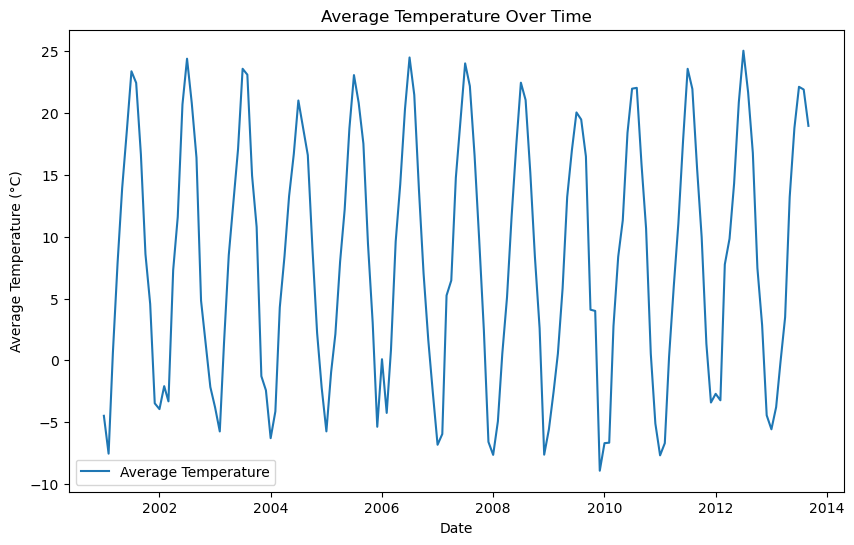

In [26]:
#1c
plt.figure(figsize=(10, 6))
plt.plot(average_temp_data['dt'], average_temp_data['AverageTemperature'], label='Average Temperature')
plt.xlabel('Date')
plt.ylabel('Average Temperature (°C)')
plt.title('Average Temperature Over Time')
plt.legend()
plt.show()

In [27]:
#1d
average_temp_data['DateNumeric'] = average_temp_data['dt'].apply(lambda x: x.timestamp())
average_temp_data

,dt,AverageTemperature,DateNumeric
0,2001-01-01,-4.480333,9.783072e+08
1,2001-02-01,-7.541000,9.809856e+08
2,2001-03-01,0.590333,9.834048e+08
3,2001-04-01,7.889000,9.860832e+08
4,2001-05-01,13.908667,9.886752e+08
...,...,...,...
148,2013-05-01,13.196000,1.367366e+09
149,2013-06-01,18.783667,1.370045e+09
150,2013-07-01,22.110333,1.372637e+09
151,2013-08-01,21.890000,1.375315e+09


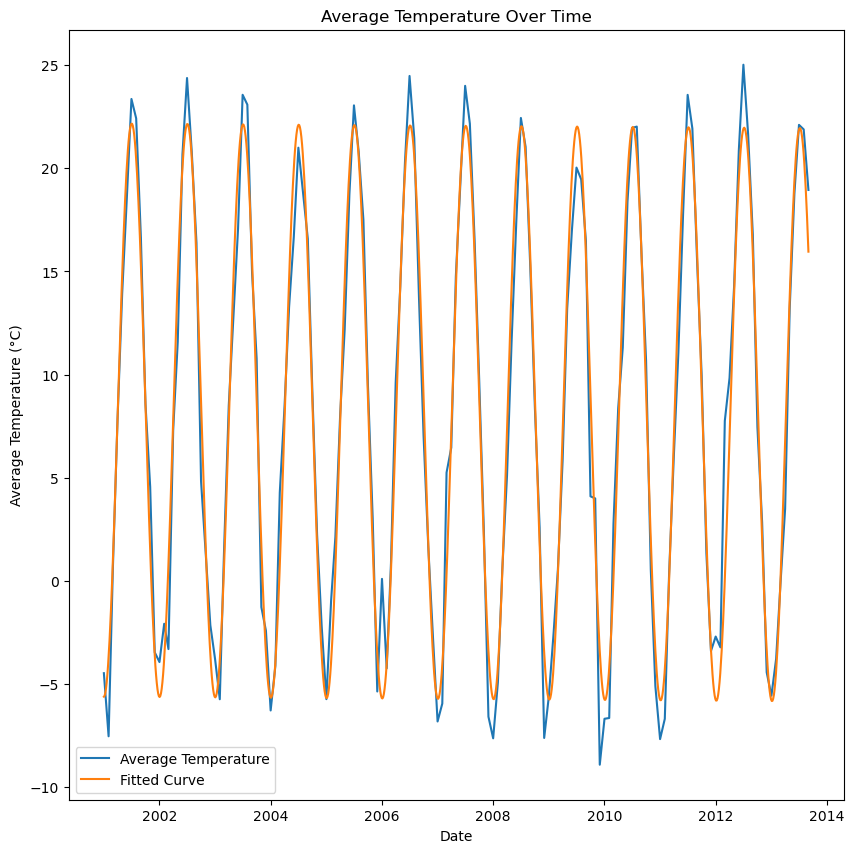

In [31]:
#1e-g
def func(x, m, b, a, f):
    return m*x + b + a*np.cos(2 * np.pi * f * x)

x = average_temp_data['DateNumeric'] - average_temp_data['DateNumeric'].min()
y = average_temp_data['AverageTemperature'].values

p0 = [0, y.mean(), 5, 1 / (365 * 24 * 60 * 60)]

par, cov = fit.curve_fit(func, x, y, p0)
m, b, a, f = par

min_date = average_temp_data['dt'].min()
x_fit = np.linspace(x.min(), x.max(), 1000)
x_fit_dates = pd.to_datetime(min_date + pd.to_timedelta(x_fit, unit='s'))
y_fit = func(x_fit, *par)

plt.figure(figsize = (10, 10))
plt.plot(average_temp_data['dt'], average_temp_data['AverageTemperature'], label='Average Temperature')
plt.plot(x_fit_dates, y_fit, label='Fitted Curve')
plt.xlabel('Date')
plt.ylabel('Average Temperature (°C)')
plt.title('Average Temperature Over Time')
plt.legend()
plt.show()

In [32]:
#1h-i
errors = np.sqrt(np.diag(cov))

# Print parameters with their errors
print("Fitted Parameters with Errors:")
for i, (par, error) in enumerate(zip(par, errors), 1):
    print(f"Parameter {i}: {par:.4f} ± {error:.4f}")

# Construct the final equation
par, cov = fit.curve_fit(func, x, y, p0)
m, b, a, f = par

# Print the equation
print("Final Equation:")
print(f"y = {m:.4f} * x + {b:.4f} + ({a:.4f} * cos(2 * π * ({f:.4e} * x)")

Fitted Parameters with Errors:
Parameter 1: -0.0000 ± 0.0000
Parameter 2: 8.2821 ± 0.3216
Parameter 3: -13.9010 ± 0.2281
Parameter 4: 0.0000 ± 0.0000
Final Equation:
y = -0.0000 * x + 8.2821 + (-13.9010 * cos(2 * π * (3.1659e-08 * x)


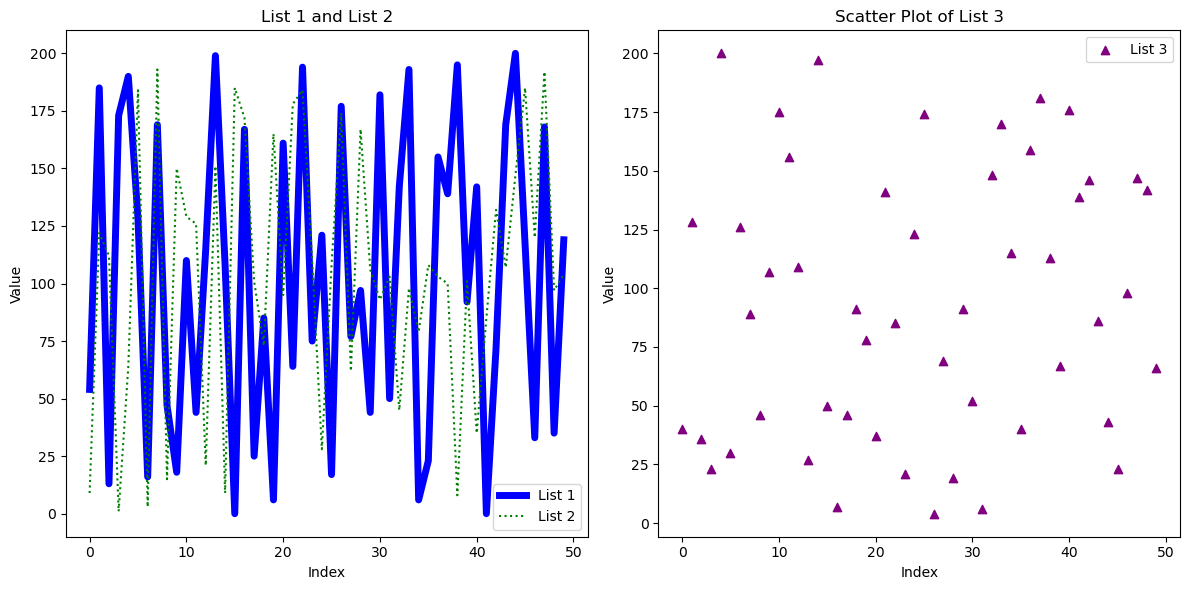

In [33]:
#2
list1 = [random.randint(0, 200) for _ in range(50)]
list2 = [random.randint(0, 200) for _ in range(50)]
list3 = [random.randint(0, 200) for _ in range(50)]

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

axes[0].plot(list1, color='blue', linewidth=5, label='List 1')
axes[0].plot(list2, color='green', linestyle=':', label='List 2')
axes[0].set_title('List 1 and List 2')
axes[0].legend()
axes[0].set_xlabel('Index')
axes[0].set_ylabel('Value')

axes[1].scatter(range(len(list3)), list3, color='purple', marker='^', label='List 3')
axes[1].set_title('Scatter Plot of List 3')
axes[1].legend()
axes[1].set_xlabel('Index')
axes[1].set_ylabel('Value')

plt.tight_layout()
plt.show()

In [34]:
#3
num_points = 10

random_points = np.random.rand(num_points, 2)
distances = np.sqrt(random_points[:, 0]**2 + random_points[:, 1]**2)
points_within_circle = np.sum(distances <= 1)

print(points_within_circle)

5


In [35]:
num_points = 1000

random_points = np.random.rand(num_points, 2)
distances = np.sqrt(random_points[:, 0]**2 + random_points[:, 1]**2)
points_within_circle = np.sum(distances <= 1)

print(points_within_circle)

777


In [36]:
num_points = 1000

random_points = np.random.rand(num_points, 2)
distances = np.sqrt(random_points[:, 0]**2 + random_points[:, 1]**2)
points_within_circle = np.sum(distances <= 1)

print(points_within_circle)

790


In [37]:
num_points = 100000

random_points = np.random.rand(num_points, 2)
distances = np.sqrt(random_points[:, 0]**2 + random_points[:, 1]**2)
points_within_circle = np.sum(distances <= 1)

print(points_within_circle)

78387


In [38]:
num_points = 1000000

random_points = np.random.rand(num_points, 2)
distances = np.sqrt(random_points[:, 0]**2 + random_points[:, 1]**2)
points_within_circle = np.sum(distances <= 1)

print(points_within_circle)

785583


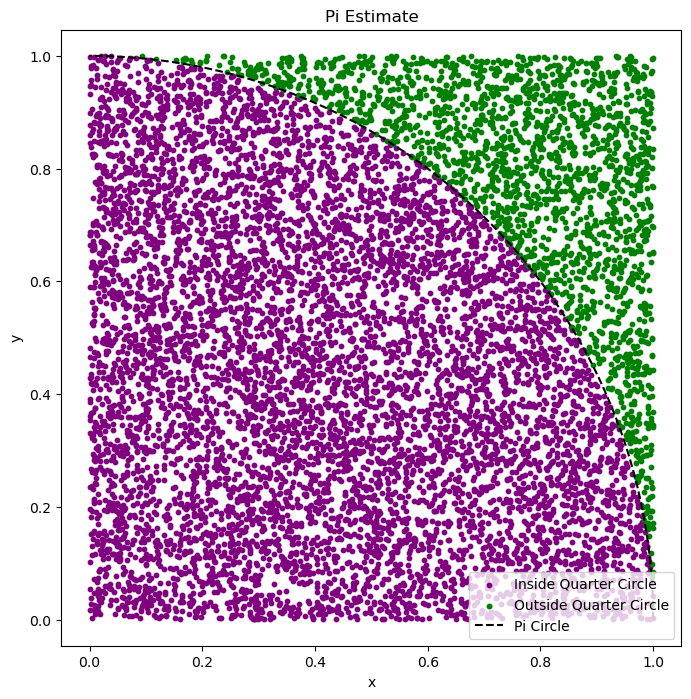

In [39]:
num_points = 10000

random_points = np.random.rand(num_points, 2)
distances = np.sqrt(random_points[:, 0]**2 + random_points[:, 1]**2)
points_within_circle = np.sum(distances <= 1)

points_inside = random_points[distances <= 1]
points_outside = random_points[distances > 1]

pi_estimate = 4 * len(points_inside) / num_points

plt.figure(figsize=(8, 8))
plt.scatter(points_inside[:, 0], points_inside[:, 1], color='purple', label='Inside Quarter Circle', s=10)
plt.scatter(points_outside[:, 0], points_outside[:, 1], color='green', label='Outside Quarter Circle', s=10)

theta = np.linspace(0, np.pi/2, 100)
x = np.cos(theta)
y = np.sin(theta)
plt.plot(x, y, color='black', linestyle='--', label='Pi Circle')

plt.title("Pi Estimate")
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.axis('equal') 
plt.show()